<a href="https://colab.research.google.com/github/Arshiya-Begum30/FMML_Poject_and_labs/blob/main/Module_5_Lab_2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Lab 2: Loss Functions**

**Exercises:**

1) Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

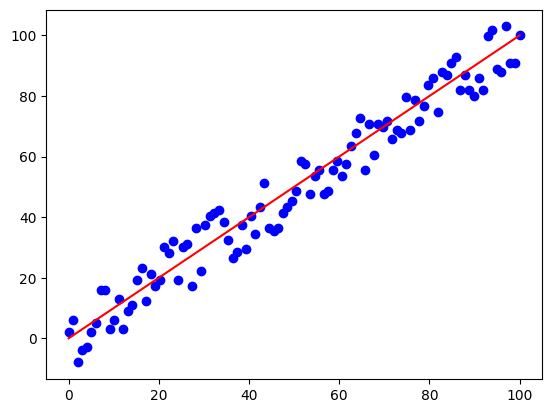

In [ ]:
np.random.seed(0)
x = np.linspace(0, 100, 100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10, 10, 100)

plt.plot(x, y_actual, color="red")
plt.scatter(x, y_pred, color="blue")
plt.show()

In [ ]:
mse = np.mean((y_actual - y_pred) ** 2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))
mae = np.mean(np.abs(y_actual - y_pred))
print("MAE is: {}".format(mae))

MSE is: 38.68
RMSE is: 6.219324722186485
MAE is: 5.5


2) Explore other loss functions and try to understand when and why they are used.

In [ ]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss)

# Using Huber Loss
huber_loss_value = np.mean(huber_loss(y_actual, y_pred, delta=1.0))
print("Huber Loss is: {}".format(huber_loss_value))

Huber Loss is: 5.02


3) Try out KNN-regression on other datasets see which values of K give the best results.

In [ ]:
train_path = "https://raw.githubusercontent.com/foorilla/infosec-jobs-com-salaries/main/salaries.csv"

train = pd.read_csv(train_path)

In [ ]:
# Preprocess Data

def preprocess(df):

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_SG,company_location_SI,company_location_TR,company_location_UM,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
0,2023,150000,150000,100,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2023,90000,90000,100,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2023,242000,242000,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2023,106200,106200,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2023,135000,135000,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('salary_in_usd', axis=1)
y_train = train['salary_in_usd']

x_test = test.drop('salary_in_usd', axis = 1)
y_test = test['salary_in_usd']

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

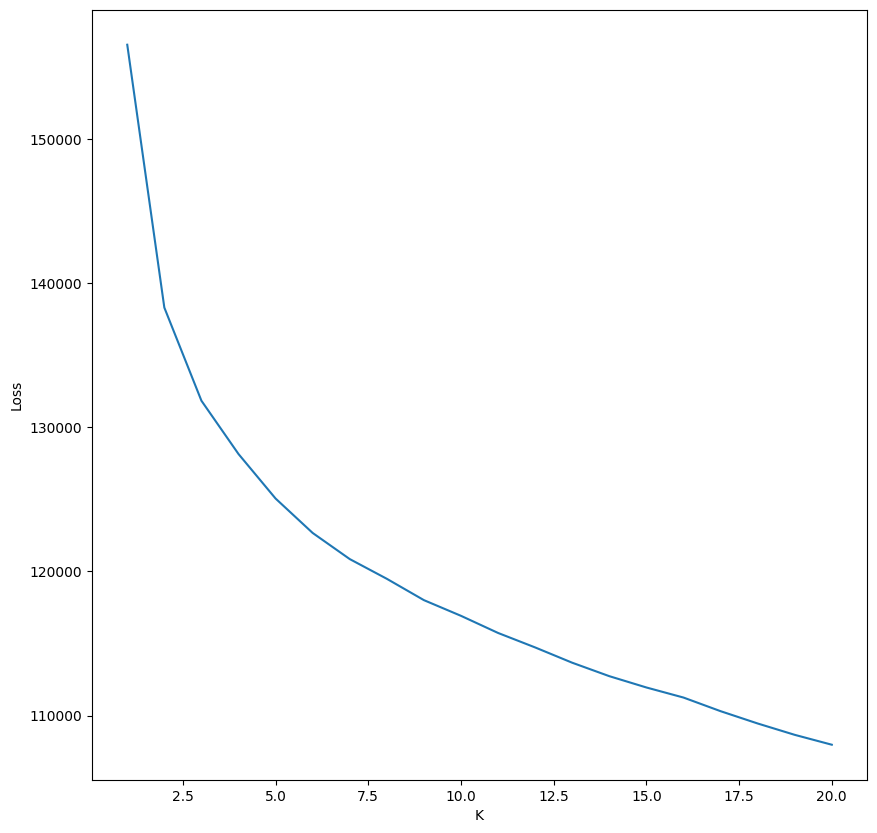

Minimum error 107981.23698230473 is at k = 19


In [ ]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))